In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pylab as rcParams
import warnings
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [3]:
x,y = make_circles(n_samples = 100, noise = 0.1, random_state = 1)

<Axes: >

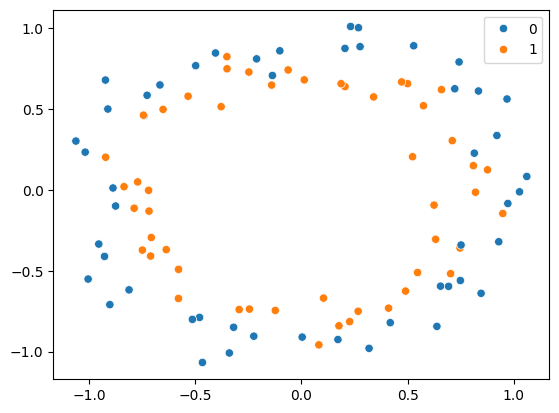

In [7]:
# plt.scatter(x[:,:-1],x[:,-1],s= 100,c = y)
sns.scatterplot(x = x[:,0],y = x[:,1],hue = y)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [9]:
model = Sequential()
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [10]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])


In [11]:
history = model.fit(x_train,y_train,epochs =3500, validation_data=(x_test,y_test),verbose = 0)

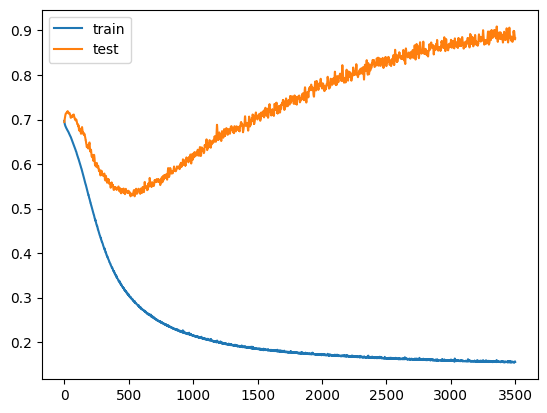

In [12]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


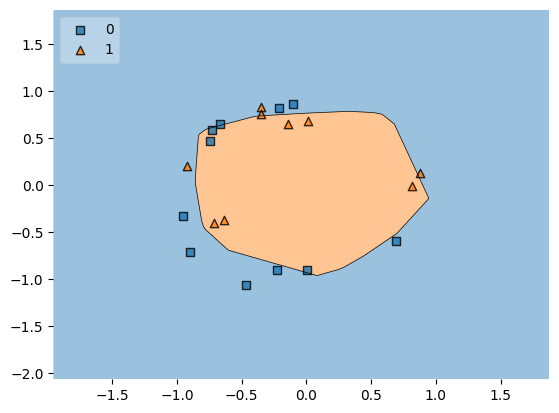

In [13]:
plot_decision_regions(x_test,y_test.ravel(),clf = model, legend = 2)
plt.show()

###EARLY STOPPING

In [21]:
model = Sequential()
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [22]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [26]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = True
)

In [27]:
history = model.fit(x_train,y_train,epochs = 3500,validation_data = (x_test,y_test),callbacks = callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5547 - loss: 0.6788 - val_accuracy: 0.3500 - val_loss: 0.7240
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5312 - loss: 0.6809 - val_accuracy: 0.3500 - val_loss: 0.7258
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5430 - loss: 0.6793 - val_accuracy: 0.3500 - val_loss: 0.7268
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5742 - loss: 0.6731 - val_accuracy: 0.3500 - val_loss: 0.7279
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5625 - loss: 0.6752 - val_accuracy: 0.3500 - val_loss: 0.7284
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5531 - loss: 0.6741 - val_accuracy: 0.3500 - val_loss: 0.7273
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5727 - loss: 0.6767 - val_accuracy: 0.3500 - val_loss: 0.7260
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6156 - loss: 0.6609 - val_accuracy: 0.3500 - v

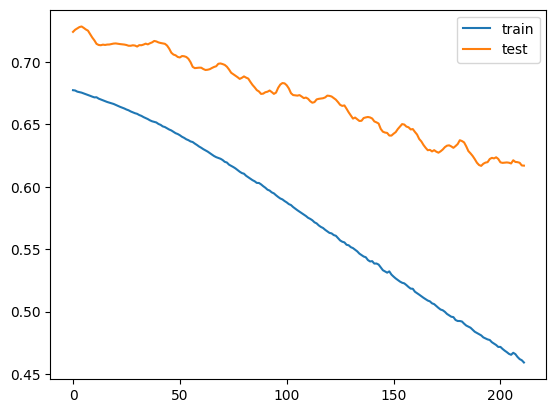

In [28]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

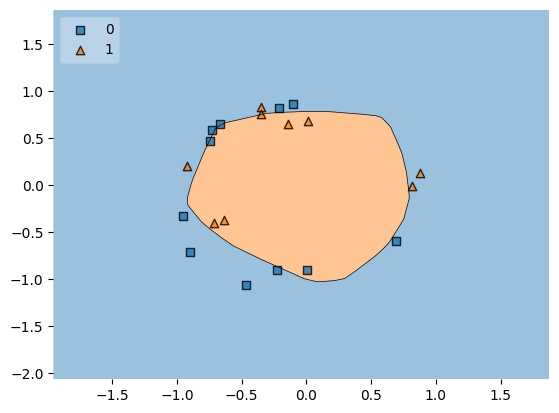

In [29]:
plot_decision_regions(x_test,y_test.ravel(),clf = model, legend = 2)
plt.show